# Elastic Net

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [9]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Elastic Net) na powyższym zbiorze danych 

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


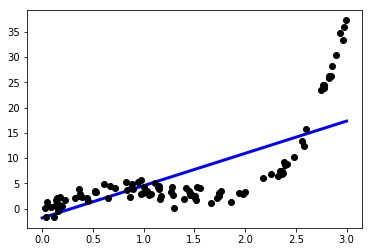

In [10]:
clf = linear_model.ElasticNetCV(alphas=[1.0,2.0,10.0],l1_ratio=[1.0,2.0,10.0])
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Proszę wykonać regresję (Elastic Net) oraz klasyczną regresję z różną ilosćią parametrów oraz stopniem wielomianu. 

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 